In [7]:
import numpy
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

class SumTree:
    write = 0 # pocet polozek pro prepisovani
    #tree #19
    #data #data
    #capacity #kapacita

    def __init__(self, capacity):
        self.capacity = capacity
        self.tree = numpy.zeros( 2*capacity - 1 )
        #print("self.tree: {}" .format(self.tree))
        self.data = numpy.zeros( capacity, dtype=object )
        #print("self.data: {}" .format(self.data))
        
    def _propagate(self, idx, change):
        parent = (idx - 1) // 2

        self.tree[parent] += change

        if parent != 0:
            self._propagate(parent, change)

    def _retrieve(self, idx, s):
        left = 2 * idx + 1
        #print("left: {}" .format(left))
        right = left + 1
        #print("right: {}" .format(right))
        #print("len(self.tree): {}" .format(len(self.tree)))
        if left >= len(self.tree):
            #print("I'm here!")
            return idx
        
        #print("self.tree[left]: {}".format(self.tree[left]))
        if s <= self.tree[left]:
            #print("first: left: {}, s: {}" .format(left, s))
            return self._retrieve(left, s)
        else:
            #print("second: right: {}, s-self.tree[left]: {}" .format(right, s-self.tree[left]))
            return self._retrieve(right, s-self.tree[left])

    def total(self):
        return self.tree[0]

    def add(self, p, data):
        idx = self.write + self.capacity - 1  #index

        self.data[self.write] = data
        self.update(idx, p)

        self.write += 1
        if self.write >= self.capacity:
            self.write = 0

    def update(self, idx, p):
        change = p - self.tree[idx]

        self.tree[idx] = p
        self._propagate(idx, change)

    def get(self, s):
        idx = self._retrieve(0, s)
        dataIdx = idx - self.capacity + 1

        return (idx, self.tree[idx], self.data[dataIdx])



In [8]:
class Memory:   # stored as ( s, a, r, s_ ) in SumTree
    e = 0.01
    a = 1

    def __init__(self, capacity):
        self.tree = SumTree(capacity)

    def _getPriority(self, error):
        return (error + self.e) ** self.a

    def add(self, error, sample):
        p = self._getPriority(error)
        self.tree.add(p, sample) 

    def sample(self, n):
        batch = []
        segment = self.tree.total() / n #15
        #print("segment: {}".format(segment))
        
        for i in range(n):
            #print("i: {}" .format(i))
            a = segment * i 
            #print("a: {}" .format(a))
            b = segment * (i + 1)
            #print("b: {}" .format(b))
            s = random.uniform(a, b)
            #print("s: {}" .format(s))
            (idx, p, data) = self.tree.get(s)
            batch.append( (idx, data) )

        return batch

    def update(self, idx, error):
        p = self._getPriority(error)
        self.tree.update(idx, p)

write: 0
capacity: 5
self.data: [ 12.05   7.03   5.02   5.02   2.01   2.01   3.01   4.01   1.01]
tree.total: 12.049999999999999
1: (7, 4.0099999999999998, 'hafno')
2: (7, 4.0099999999999998, 'hafno')
3: (7, 4.0099999999999998, 'hafno')
4: (7, 4.0099999999999998, 'hafno')
5: (8, 1.01, 'hafnou')
6: (4, 2.0099999999999998, 'hofno')
7: (4, 2.0099999999999998, 'hofno')
8: (5, 2.0099999999999998, 'hifnou')
9: (5, 2.0099999999999998, 'hifnou')
10: (6, 3.0099999999999998, 'hefno')
11: (6, 3.0099999999999998, 'hefno')
12: (6, 3.0099999999999998, 'hefno')
tree.total: 11.049999999999999
1: (7, 4.0099999999999998, 'hafno')
2: (7, 4.0099999999999998, 'hafno')
3: (7, 4.0099999999999998, 'hafno')
4: (7, 4.0099999999999998, 'hafno')
5: (8, 1.01, 'hafnou')
6: (4, 1.01, 'hafneu')
7: (5, 2.0099999999999998, 'hifnou')
8: (5, 2.0099999999999998, 'hifnou')
9: (6, 3.0099999999999998, 'hefno')
10: (6, 3.0099999999999998, 'hefno')
11: (6, 3.0099999999999998, 'hefno')
[(6, 'hefno')]
Jedna: 0
Dva: 0
Tri: 0
Ctyri

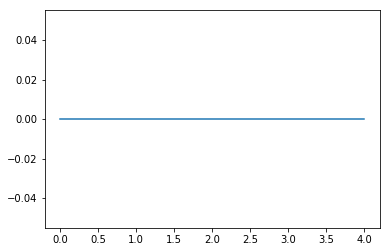

In [9]:
memory = Memory(5)
                
#print("tree.total: {}".format(memory.tree.total()))

memory.add(2, "hofno")
memory.add(2, "hifnou")
memory.add(3, "hefno")
memory.add(4, "hafno")
memory.add(1, "hafnou")
print("write: {}" .format(memory.tree.write))
print("capacity: {}" .format(memory.tree.capacity))
#memory.add(4, "hifnoa")


print("self.data: {}" .format(memory.tree.tree))
#print("self.data: {}" .format(memory.tree.data))
print("tree.total: {}".format(memory.tree.total()))

for i in range (1,13):
    print("{}: {}".format(i, memory.tree.get(i) ))
memory.add(1, "hafneu")
print("tree.total: {}".format(memory.tree.total()))

for i in range (1,12):
    print("{}: {}".format(i, memory.tree.get(i) ))

#batch = memory.sample(2)
#print("{}" .format(batch))

def function():
    jedna = 0
    dva = 0
    tri = 0
    ctyri = 0
    pet = 0

    for i in range(1):
        batch = memory.sample(1)
        if batch[i][1] == 1:
            jedna = jedna + 1
        if batch[i][1] == 2:
            dva = dva + 1
        if batch[i][1] == 3:
            tri = tri + 1
        if batch[i][1] == 4:
            ctyri = ctyri + 1
        if batch[i][1] == 5:
            pet = pet + 1

    print("{}" .format(batch))
        
    print("Jedna: {}" .format(jedna))
    print("Dva: {}" .format(dva))
    print("Tri: {}" .format(tri))
    print("Ctyri: {}" .format(ctyri))
    print("Pet: {}" .format(pet))

    x = np.array([jedna,dva,tri,ctyri, pet])
    y = np.array([1,2,3,4,5])
    plt.plot(x)
    
function()